___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,5)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

### 1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [10]:
df = df.drop(columns=["RowNumber", "CustomerId","Surname"])

In [11]:
cat_col = ["HasCrCard", "IsActiveMember", "NumOfProducts"]

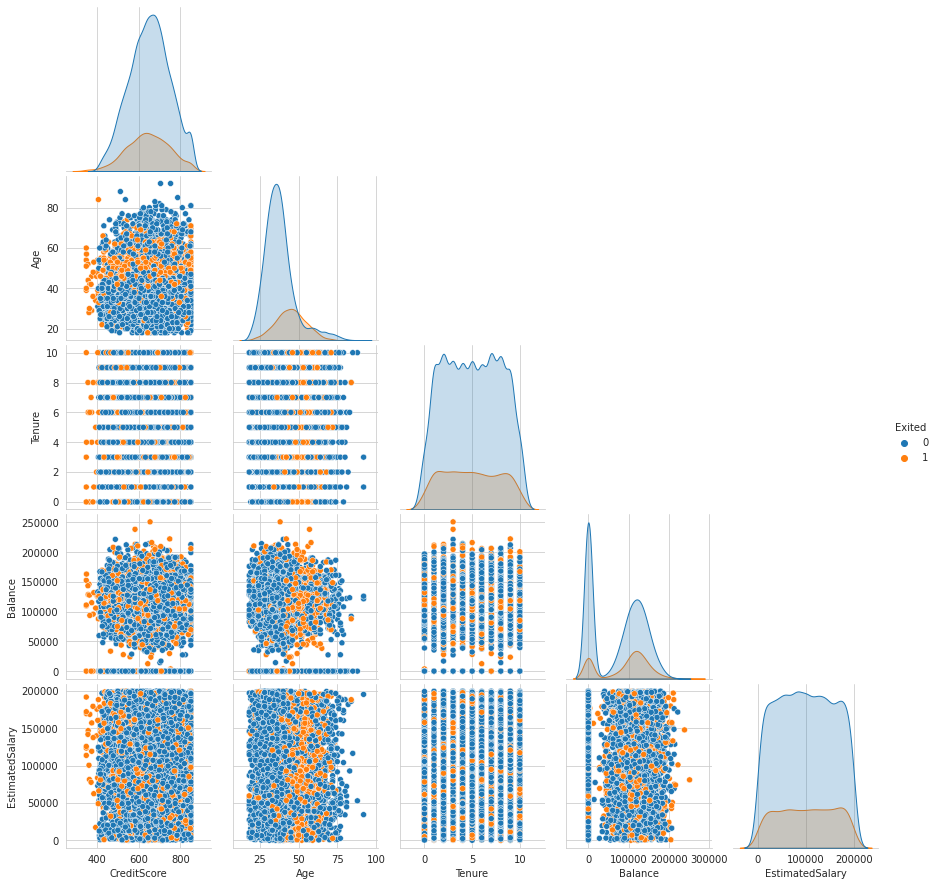

In [12]:
sns.pairplot(df.drop(columns=cat_col), hue="Exited", corner=True)
plt.show()

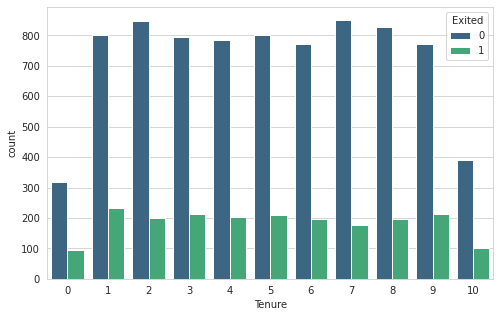

In [13]:
sns.countplot(data=df, x="Tenure", hue="Exited", palette="viridis")
plt.show()

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

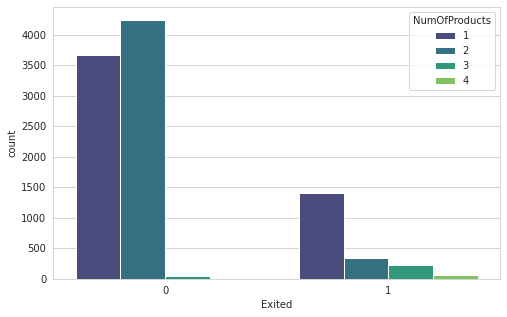

In [15]:
sns.countplot(data=df, hue="NumOfProducts", x="Exited", palette="viridis")
plt.show()

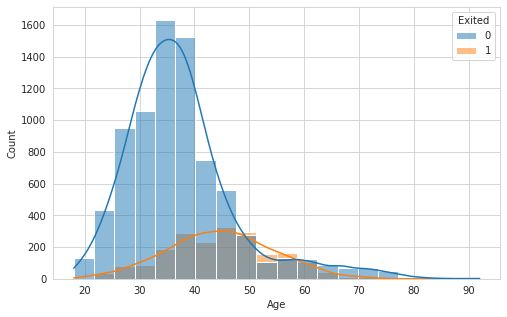

In [16]:
sns.histplot(data=df, x="Age", hue="Exited", bins=20, kde=True)
plt.show()

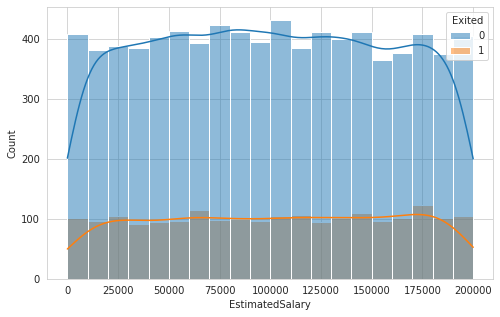

In [17]:
sns.histplot(data=df, x="EstimatedSalary", hue="Exited", bins=20, kde=True)
plt.show()

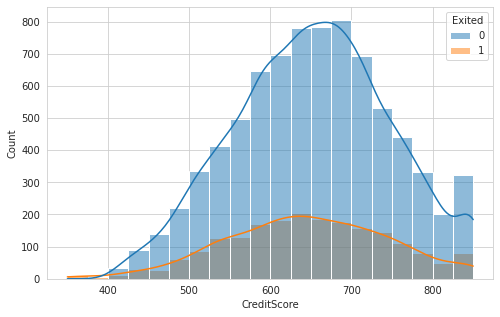

In [18]:
sns.histplot(data=df, x="CreditScore", hue="Exited", bins=20, kde=True)
plt.show()

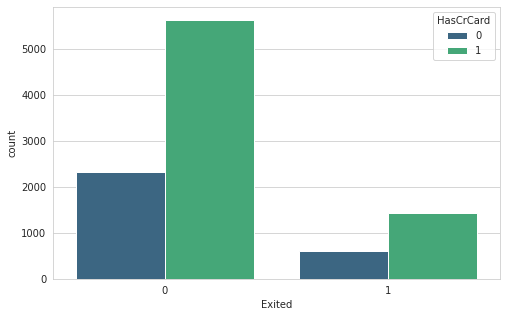

In [19]:
sns.countplot(data=df, hue="HasCrCard", x="Exited", palette="viridis")
plt.show()

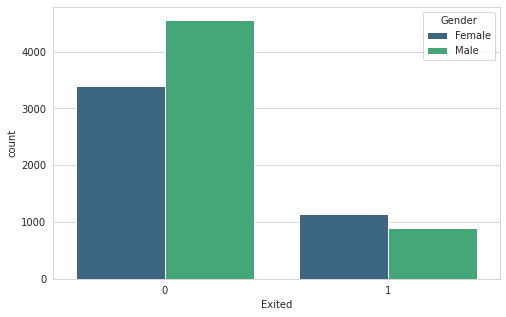

In [20]:
sns.countplot(data=df, hue="Gender", x="Exited", palette="viridis")
plt.show()

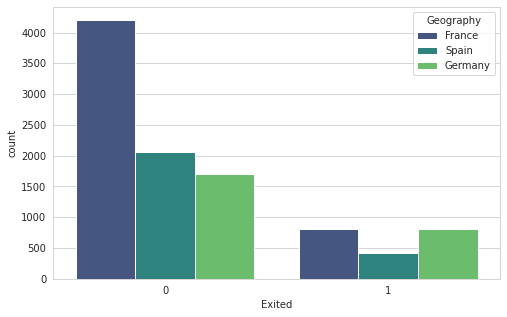

In [21]:
sns.countplot(data=df, hue="Geography", x="Exited", palette="viridis")
plt.show()

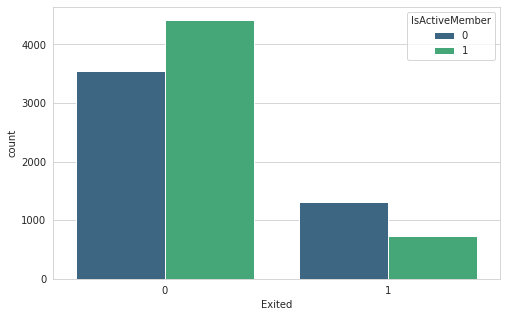

In [22]:
sns.countplot(data=df, hue="IsActiveMember", x="Exited", palette="viridis")
plt.show()

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
df.Gender = df.Gender.map(lambda x: 1 if x == "Male" else 0)
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [27]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [28]:
df.Geography = df.Geography.map(lambda x: 1 if x == "France" else (2 if x == "Germany" else 3))
df.Geography.value_counts()

1    5014
2    2509
3    2477
Name: Geography, dtype: int64

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.000,1,1,1,101348.880,1
1,608,3,0,41,1,83807.860,1,0,1,112542.580,0
2,502,1,0,42,8,159660.800,3,1,0,113931.570,1
3,699,1,0,39,1,0.000,2,0,0,93826.630,0
4,850,3,0,43,2,125510.820,1,1,1,79084.100,0


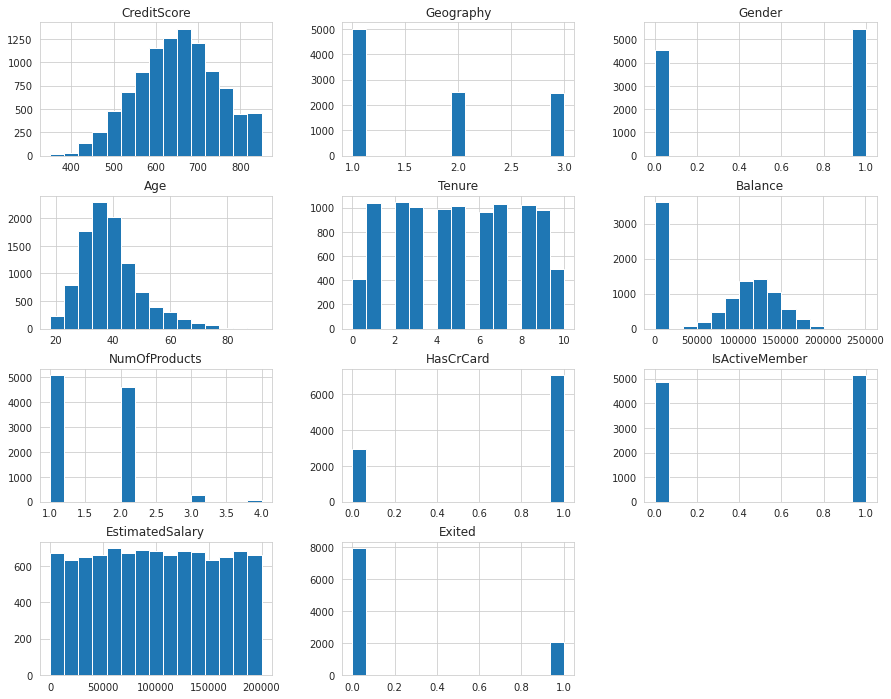

In [30]:
df.hist(figsize=(15, 12), bins=15);

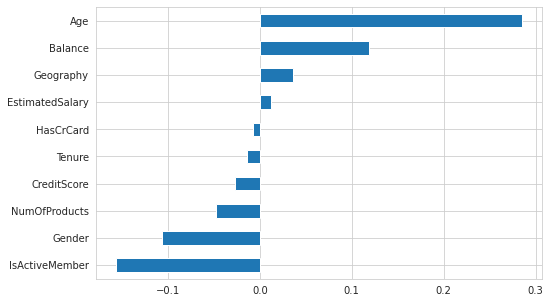

In [31]:
df.corr()["Exited"][:-1].sort_values().plot.barh();

# Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [34]:
scaler = MinMaxScaler()

# Modelling & Model Performance

## without class_weigth

In [37]:
seed = 42
tf.random.set_seed(seed)

In [38]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create The Model

In [40]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [41]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)

Epoch 1/300
64/64 [==============================] - 5s 8ms/step - loss: 0.5958 - recall: 0.1144 - val_loss: 0.5012 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4975 - recall: 0.0000e+00 - val_loss: 0.4855 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4853 - recall: 0.0000e+00 - val_loss: 0.4718 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4747 - recall: 0.0000e+00 - val_loss: 0.4611 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4657 - recall: 6.0533e-04 - val_loss: 0.4496 - val_recall: 0.0055
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4548 - recall: 0.0163 - val_loss: 0.4375 - val_recall: 0.0331
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4429 - recall: 0.0932 - val_loss: 0.4193 - val_recall: 0.2431
Epoch 8/3

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


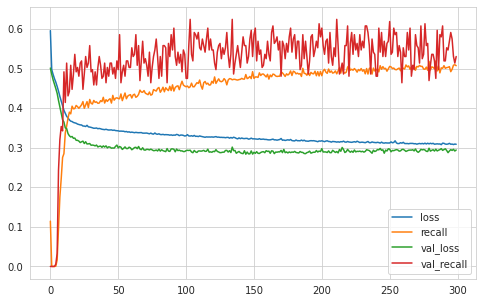

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [45]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[761  35]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



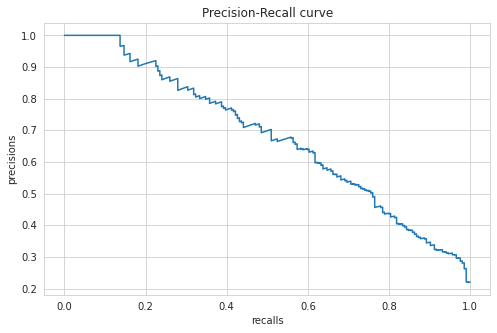

In [46]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [51]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [52]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 10ms/step - loss: 0.6818 - recall: 0.8178 - val_loss: 0.6847 - val_recall: 0.7459
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6514 - recall: 0.6804 - val_loss: 0.6711 - val_recall: 0.7514
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6306 - recall: 0.6804 - val_loss: 0.6149 - val_recall: 0.7127
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6128 - recall: 0.6822 - val_loss: 0.5962 - val_recall: 0.7238
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5976 - recall: 0.7107 - val_loss: 0.5644 - val_recall: 0.6796
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5835 - recall: 0.7058 - val_loss: 0.5195 - val_recall: 0.6464
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5738 - recall: 0.7070 - val_loss: 0.5617 - val_recall: 0.7403
Epoch 8/300
64/64 [=====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

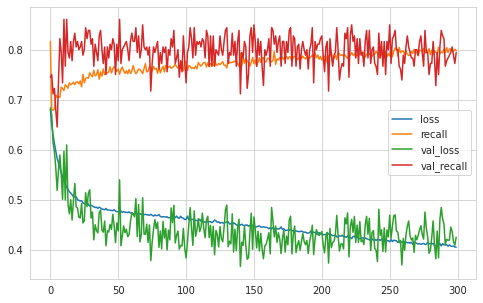

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[627 169]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



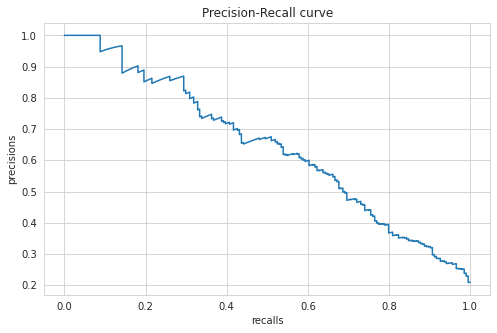

In [56]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# lr=0.01 => led to overfitting
# lr=0.005 => led to overfitting
# lr=0.003 => led to overfitting

In [58]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 8ms/step - loss: 0.6501 - recall: 0.6907 - val_loss: 0.5848 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6026 - recall: 0.6858 - val_loss: 0.6476 - val_recall: 0.8508
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5708 - recall: 0.7016 - val_loss: 0.5638 - val_recall: 0.8232
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5340 - recall: 0.7324 - val_loss: 0.5757 - val_recall: 0.8674
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5265 - recall: 0.7173 - val_loss: 0.4572 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5119 - recall: 0.7337 - val_loss: 0.4405 - val_recall: 0.7514
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5037 - recall: 0.7464 - val_loss: 0.4465 - val_recall: 0.7735
Epoch 8/300
64/64 [======================

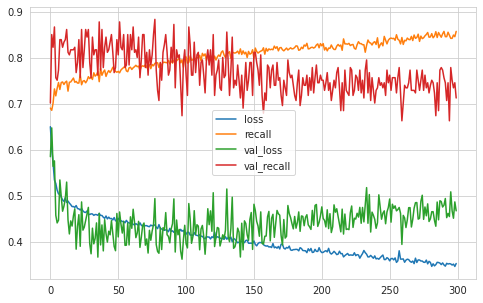

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.70      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.78      0.79      1000



### Add Dropout Layer

In [61]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [62]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6906 - recall: 0.6816 - val_loss: 0.6805 - val_recall: 0.6464
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6763 - recall: 0.6017 - val_loss: 0.6659 - val_recall: 0.7072
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6658 - recall: 0.6011 - val_loss: 0.6245 - val_recall: 0.6354
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6563 - recall: 0.6362 - val_loss: 0.6059 - val_recall: 0.6354
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6489 - recall: 0.6023 - val_loss: 0.6328 - val_recall: 0.7127
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6406 - recall: 0.6295 - val_loss: 0.5825 - val_recall: 0.6409
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6329 - recall: 0.6362 - val_loss: 0.6183 - val_recall: 0.7238
Epoch 8/300
64/64 [======================

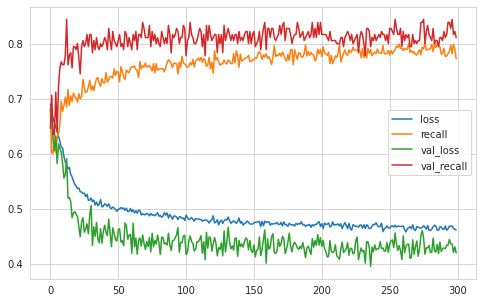

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [65]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[606 190]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.46      0.78      0.58       204

    accuracy                           0.77      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.77      0.78      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [66]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [67]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [68]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6723 - recall: 0.6023 - val_loss: 0.6309 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6433 - recall: 0.6447 - val_loss: 0.6223 - val_recall: 0.7348
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6129 - recall: 0.6634 - val_loss: 0.5861 - val_recall: 0.7569
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5810 - recall: 0.6907 - val_loss: 0.5509 - val_recall: 0.8287
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5644 - recall: 0.6901 - val_loss: 0.4701 - val_recall: 0.7403
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5438 - recall: 0.6889 - val_loss: 0.4264 - val_recall: 0.7293
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5373 - recall: 0.7203 - val_loss: 0.5053 - val_recall: 0.8287
Epoch 8/300
64/64 [======================

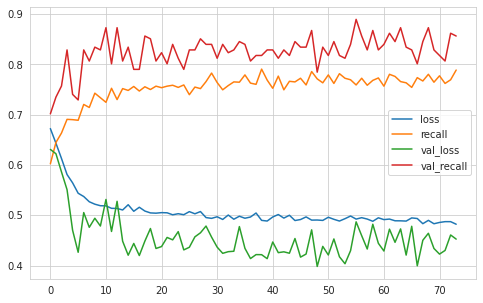

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [70]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[643 153]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       796
           1       0.50      0.75      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



#### Monitor the "val_recall" as metric

In [71]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [72]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [73]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.6723 - recall: 0.6023 - val_loss: 0.6309 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6433 - recall: 0.6447 - val_loss: 0.6223 - val_recall: 0.7348
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6129 - recall: 0.6634 - val_loss: 0.5861 - val_recall: 0.7569
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5810 - recall: 0.6907 - val_loss: 0.5509 - val_recall: 0.8287
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5644 - recall: 0.6901 - val_loss: 0.4701 - val_recall: 0.7403
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5438 - recall: 0.6889 - val_loss: 0.4264 - val_recall: 0.7293
Epoch 7/300
64/64 [==============================] - 0s 8ms/step - loss: 0.5373 - recall: 0.7203 - val_loss: 0.5053 - val_recall: 0.8287
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

[[494 302]
 [ 27 177]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       796
           1       0.37      0.87      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.74      0.63      1000
weighted avg       0.83      0.67      0.70      1000



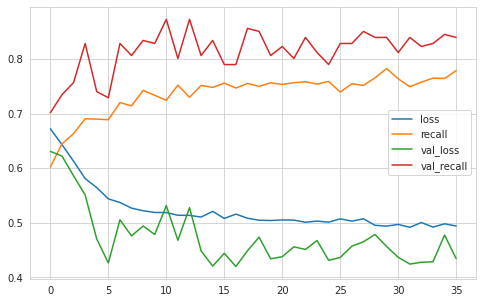

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Finally recall for group 1  is increased. It means that we can detect Exited people altough we will have high false pozitive ratio.

## GridSearchCV

In [75]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [76]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [77]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [79]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [80]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 1s 12ms/step - loss: 0.6743 - recall: 0.6295 - val_loss: 0.6401 - val_recall: 0.6906
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6511 - recall: 0.6138 - val_loss: 0.6236 - val_recall: 0.6906
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6332 - recall: 0.6326 - val_loss: 0.5945 - val_recall: 0.6906
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6169 - recall: 0.6519 - val_loss: 0.5048 - val_recall: 0.5193
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5998 - recall: 0.6622 - val_loss: 0.5031 - val_recall: 0.6630
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5738 - recall: 0.6949 - val_loss: 0.5414 - val_recall: 0.7956
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5643 - recall: 0.7034 - val_loss: 0.4398

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9c14ef2210>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [81]:
grid_model.best_score_

0.8627529689256296

In [82]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [83]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[451 345]
 [ 22 182]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.71       796
           1       0.35      0.89      0.50       204

    accuracy                           0.63      1000
   macro avg       0.65      0.73      0.60      1000
weighted avg       0.83      0.63      0.67      1000



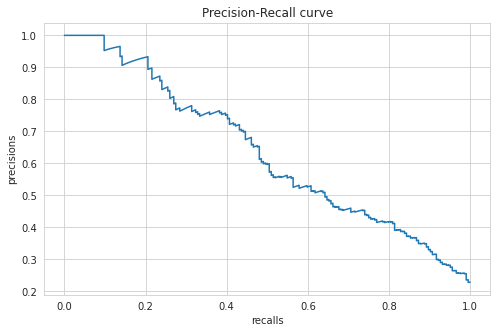

In [84]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

In [85]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 7ms/step - loss: 0.6536 - recall: 0.5870 - val_loss: 0.6259 - val_recall: 0.6765
Epoch 2/200
71/71 [==============================] - 0s 4ms/step - loss: 0.6206 - recall: 0.6738 - val_loss: 0.5941 - val_recall: 0.6569
Epoch 3/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5946 - recall: 0.6836 - val_loss: 0.5951 - val_recall: 0.7500
Epoch 4/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5687 - recall: 0.6950 - val_loss: 0.5301 - val_recall: 0.7059
Epoch 5/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5440 - recall: 0.7141 - val_loss: 0.5051 - val_recall: 0.7059
Epoch 6/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5254 - recall: 0.7169 - val_loss: 0.5324 - val_recall: 0.7549
Epoch 7/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5114 - recall: 0.7398 - val_loss: 0.4307 - val_recall: 0.6373
Epoch 8/200
71/71 [======================

[[493 303]
 [ 25 179]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       796
           1       0.37      0.88      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.75      0.64      1000
weighted avg       0.83      0.67      0.70      1000



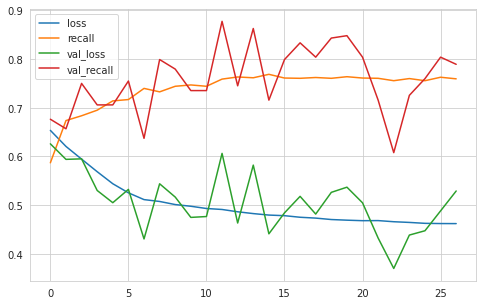

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [88]:
model.save('model_churn.h5')

## Prediction

In [89]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Geography              1.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [92]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [93]:
model.predict(single_customer)

array([[0.7007096]], dtype=float32)

In [94]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___